# Create Dataset

In [1]:
import os
import matplotlib.pyplot as plt
import mediapipe as mp
import cv2
import pickle

In [2]:
DATA_DIR = ".\dataset"

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [3]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

C:\Users\supri\AppData\Local\Temp\ipykernel_4844\2960290877.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[2, 2])


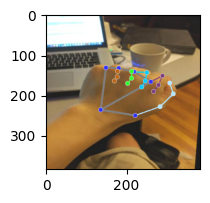

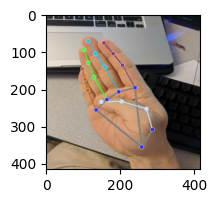

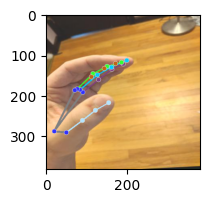

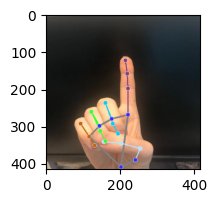

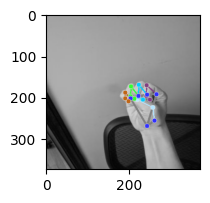

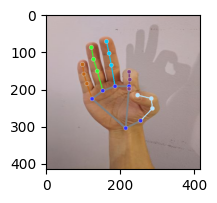

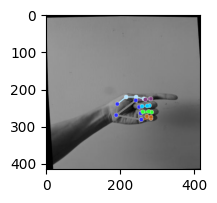

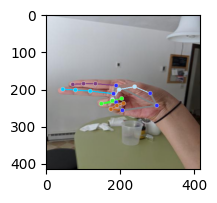

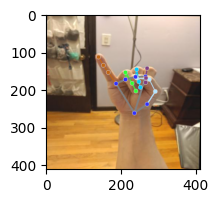

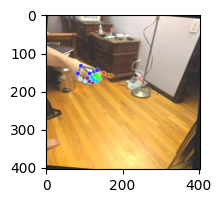

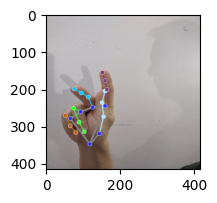

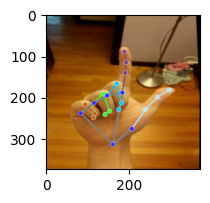

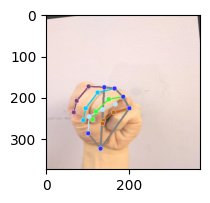

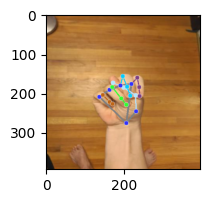

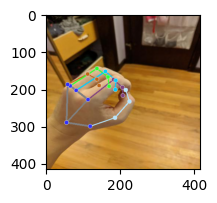

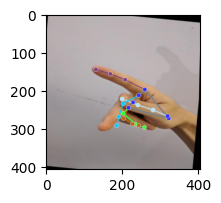

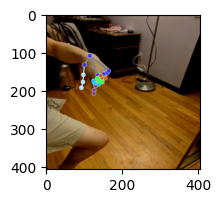

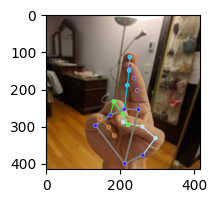

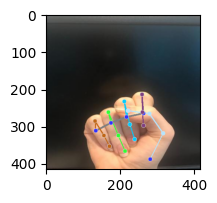

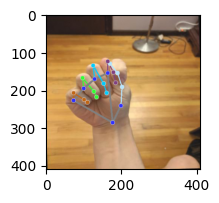

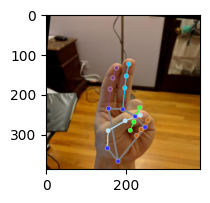

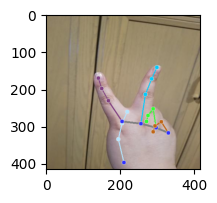

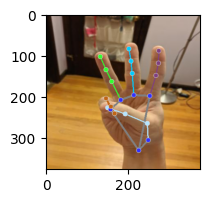

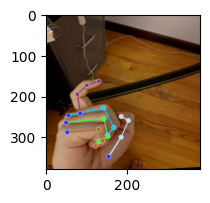

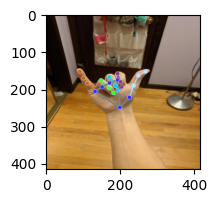

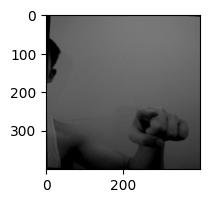

In [4]:
# plot the landmarks 

for dir_ in os.listdir(DATA_DIR):
    for letter in os.listdir(os.path.join(DATA_DIR, dir_))[:1]:
        
        img_path = os.path.join(DATA_DIR, dir_, letter)
        img = cv2.imread(img_path)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # create landmarks for the hands
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb, # image to draw
                    hand_landmarks, # model output
                    mp_hands.HAND_CONNECTIONS, 
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style(),
                    )

        plt.figure(figsize=[2, 2])
        plt.imshow(img_rgb)

plt.show()

In [5]:
data = []
labels = []


for dir_ in os.listdir(DATA_DIR):
    for letter in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img_path = os.path.join(DATA_DIR, dir_, letter)
        img = cv2.imread(img_path)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # create landmarks for the hands
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)



In [6]:
print(data[:3])
print(labels[:3])

[[0.0, 0.27476391196250916, 0.22515004873275757, 0.3105505406856537, 0.38565129041671753, 0.2536126673221588, 0.47214555740356445, 0.1692313253879547, 0.44942033290863037, 0.1001405119895935, 0.3254926800727844, 0.09208548069000244, 0.4027196764945984, 0.05411675572395325, 0.3761005997657776, 0.1130158007144928, 0.34561657905578613, 0.1546613872051239, 0.21703577041625977, 0.027608603239059448, 0.30070269107818604, 0.03173813223838806, 0.29149097204208374, 0.08750596642494202, 0.266083300113678, 0.12478289008140564, 0.11798214912414551, 0.0042823851108551025, 0.20213168859481812, 0.023439884185791016, 0.20262551307678223, 0.06961005926132202, 0.17688524723052979, 0.10174360871315002, 0.034772008657455444, 0.0, 0.10991525650024414, 0.02332824468612671, 0.10888391733169556, 0.06077468395233154, 0.08851268887519836, 0.08678469061851501], [0.4246700406074524, 0.26503294706344604, 0.22660768032073975, 0.2746133804321289, 0.06987911462783813, 0.2044185996055603, 0.0, 0.10386815667152405, 0.0

In [7]:
# saving the landmarks with labels

file = open('data.pickle', 'wb')
pickle.dump({'data' :data, 'labels' :labels}, file)
file.close()